In [ ]:
!pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae, mse



ModuleNotFoundError: No module named 'neuralforecast'

In [ ]:
X_df = pd.read_csv('/content/drive/MyDrive/AML/weather/M/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML/weather/M/df_y.csv')

# X_df = pd.read_csv('@datasets_reproducibity/weather/M/df_x.csv')
# Y_df = pd.read_csv('@datasets_reproducibity/weather/M/df_y.csv')

# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')

In [ ]:
X_df

In [ ]:
a=Y_df['unique_id'].unique()
a.size

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
# filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])
filtered_df['ds'] = range(len(filtered_df))

Y_df=filtered_df
Y_df

In [ ]:
Y_df

In [ ]:
Y_df['unique_id'].unique()

In [ ]:
Y_df

## Horizon 96

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:52599,:]
Y_test_df = Y_df.iloc[52599:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
model=DilatedRNN(h=96,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=2,
                    )



In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:52503,:]
Y_test_df = Y_df.iloc[52503:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,15352,2018-04-01 18:00:00,OT,1.348059,0.282609,0.5,-0.500000,-0.253425
1,15353,2018-04-01 19:00:00,OT,1.188256,0.326087,0.5,-0.500000,-0.253425
2,15354,2018-04-01 20:00:00,OT,0.925721,0.369565,0.5,-0.500000,-0.253425
3,15355,2018-04-01 21:00:00,OT,0.554748,0.413043,0.5,-0.500000,-0.253425
4,15356,2018-04-01 22:00:00,OT,0.120995,0.456522,0.5,-0.500000,-0.253425
...,...,...,...,...,...,...,...,...
2187,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
2188,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
2189,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
2190,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-04-01 18:00:00,OT,1.348059,0.282609,0.5,-0.500000,-0.253425
1,2018-04-01 19:00:00,OT,1.188256,0.326087,0.5,-0.500000,-0.253425
2,2018-04-01 20:00:00,OT,0.925721,0.369565,0.5,-0.500000,-0.253425
3,2018-04-01 21:00:00,OT,0.554748,0.413043,0.5,-0.500000,-0.253425
4,2018-04-01 22:00:00,OT,0.120995,0.456522,0.5,-0.500000,-0.253425
...,...,...,...,...,...,...,...
2187,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
2188,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
2189,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
2190,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=192,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=2,
                    )



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 193 K 
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
479 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,0.254487
OT,1,0.246845
OT,2,0.253822
OT,3,0.240790
OT,4,0.239369
...,...,...
OT,187,0.238940
OT,188,0.243669
OT,189,0.244388


<Axes: xlabel='ds'>

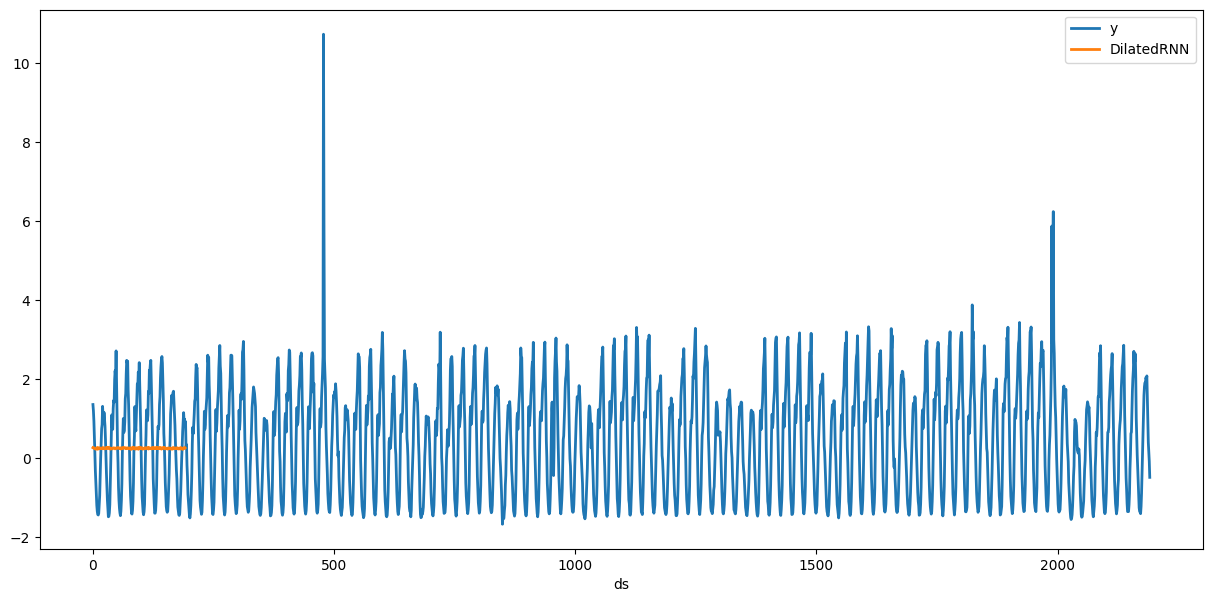

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,0.254487
1,0.246845
2,0.253822
3,0.240790
4,0.239369
...,...
187,0.238940
188,0.243669
189,0.244388


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 1.080
DilatedRNN MSE: 1.513


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:52359,:]
Y_test_df = Y_df.iloc[52359:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,15208,2018-03-26 18:00:00,OT,1.056988,0.282609,-0.5,0.333333,-0.269863
1,15209,2018-03-26 19:00:00,OT,0.822990,0.326087,-0.5,0.333333,-0.269863
2,15210,2018-03-26 20:00:00,OT,0.577577,0.369565,-0.5,0.333333,-0.269863
3,15211,2018-03-26 21:00:00,OT,0.195189,0.413043,-0.5,0.333333,-0.269863
4,15212,2018-03-26 22:00:00,OT,-0.478269,0.456522,-0.5,0.333333,-0.269863
...,...,...,...,...,...,...,...,...
2331,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
2332,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
2333,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
2334,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-03-26 18:00:00,OT,1.056988,0.282609,-0.5,0.333333,-0.269863
1,2018-03-26 19:00:00,OT,0.822990,0.326087,-0.5,0.333333,-0.269863
2,2018-03-26 20:00:00,OT,0.577577,0.369565,-0.5,0.333333,-0.269863
3,2018-03-26 21:00:00,OT,0.195189,0.413043,-0.5,0.333333,-0.269863
4,2018-03-26 22:00:00,OT,-0.478269,0.456522,-0.5,0.333333,-0.269863
...,...,...,...,...,...,...,...
2331,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
2332,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
2333,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
2334,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=336,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=2,
                    )



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 339 K 
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
625 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

## Horizon 720

In [ ]:
Y_df

In [ ]:
Y_train_df = Y_df.iloc[:51975,:]
Y_test_df = Y_df.iloc[51975:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

In [ ]:
model=DilatedRNN(h=720,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=2,
                    )



In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')